In [3]:
import numpy as np
import matplotlib.pyplot as plt
import uproot as up
from stl import mesh
from mpl_toolkits import mplot3d

#import ParticlePlottingFunctions
import ParticlePlottingFunctions as ppf
%load_ext autoreload
%autoreload 2

# %reload_ext autoreload

In [4]:
file1 = "500UCN_Fill_minus1_moreTimes.root"

#get our two different data folders already for ease
Nend = up.open(file1+":neutronend")
Nsnapshot = up.open(file1+":neutronsnapshot")

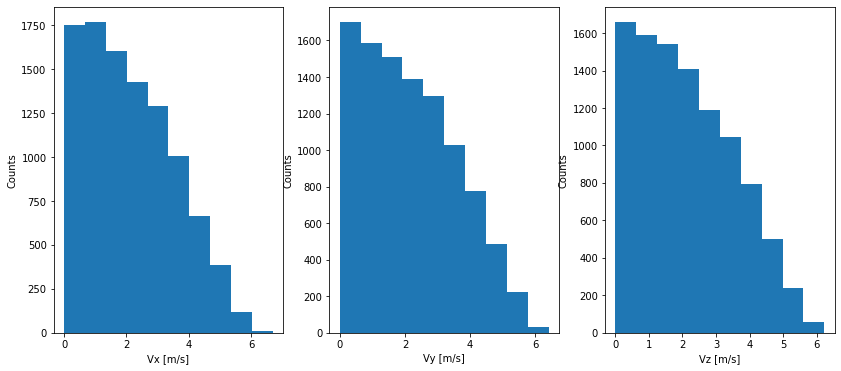

In [5]:
endSpots = Nsnapshot.arrays(["vxend", "vyend", "vzend"])

Vx = np.abs(endSpots['vxend'])
Vy = np.abs(endSpots['vyend'])
Vz = np.abs(endSpots['vzend'])

V_mag = np.sqrt(endSpots['vxend']**2 + endSpots['vyend']**2 + endSpots['vyend']**2)

fig, axs = plt.subplots(1, 3, figsize=(14,6))

axs[0].hist(Vx)
axs[0].set_xlabel('Vx [m/s]')
axs[0].set_ylabel('Counts')

axs[1].hist(Vy)
axs[1].set_xlabel('Vy [m/s]')
axs[1].set_ylabel('Counts')

axs[2].hist(Vz)
axs[2].set_xlabel('Vz [m/s]')
axs[2].set_ylabel('Counts')

plt.show()

# total magnetude of velocity
# plt.hist(V_mag)
# plt.show()

# Trying to get Neutrons only in certain geometries

In [57]:
'''
A function to graph the 3D position, in a 3D scatter plot.
'''
def plot3D_geoColor(x, y, z, geo, startPlot=True, endPlot=True, label="", figVals=None, ls="None", size=(8,8)):
    if startPlot:
        fig = plt.figure(figsize=size)
        ax1 = fig.add_subplot(1,1,1, projection='3d')
        ax1.set_xlim3d(-5, 7)
        ax1.set_ylim3d(-2, 0)
        ax1.set_zlim3d(-0.6, 0.5)
        ax1.set_xlabel('x')
        ax1.set_ylabel('y')
        ax1.set_zlabel('z')
        
    else:
        #unpack the array that holds all the fig axes
        fig, ax1 = figVals
        
    point_features = np.transpose([getColor(g) for g in geo] )
    colors = point_features[0]
    geo_label = point_features[1]
    
    ax1.plot3D(x, y, z, linestyle=ls, marker='') #for connections
    #for different colors
    ax1.scatter(x, y, z, c=colors)
    
    for i, c in enumerate(colors):
#         print(c)
        ax1.plot3D(100, 100, 100, linestyle="", marker='o', c=c, label=geo_label[i])
    
    if endPlot:
        ax1.legend()
        plt.show()
    else:
        #if it's not the end of the graph, return the figure objects
        return [fig, ax1]
    
def getColor(geo1):
    color = 'black'
    lab = None

    if geo1 == 183:
        #Long Y guide
        color = 'red'
        lab = 'Y_guide'
    elif geo1 in [187, 188]:
        #guides into chambers
        color = 'red'
    elif (2 <= geo1 <= 33) | (37 <= geo1 <= 114):
        #He vapour and liquid volumes 
        color='blue'
        lab = 'He'
    elif geo1 in [185, 186]:
        #in the chambers to do the rest of the experiment
        color = 'black'
        lab = 'in cell'
    elif geo1 == 1:
        #why??
        color = 'orange'
        lab = '1?'
        
    else: 
        print(geo1)
        
    return color, lab


# 2-33	no	nEDMsensitivity-HeVapor^nEDMsensitivity-X.STL
# 37-114	no	nEDMsensitivity-LHe^nEDMsensitivity-X.STL

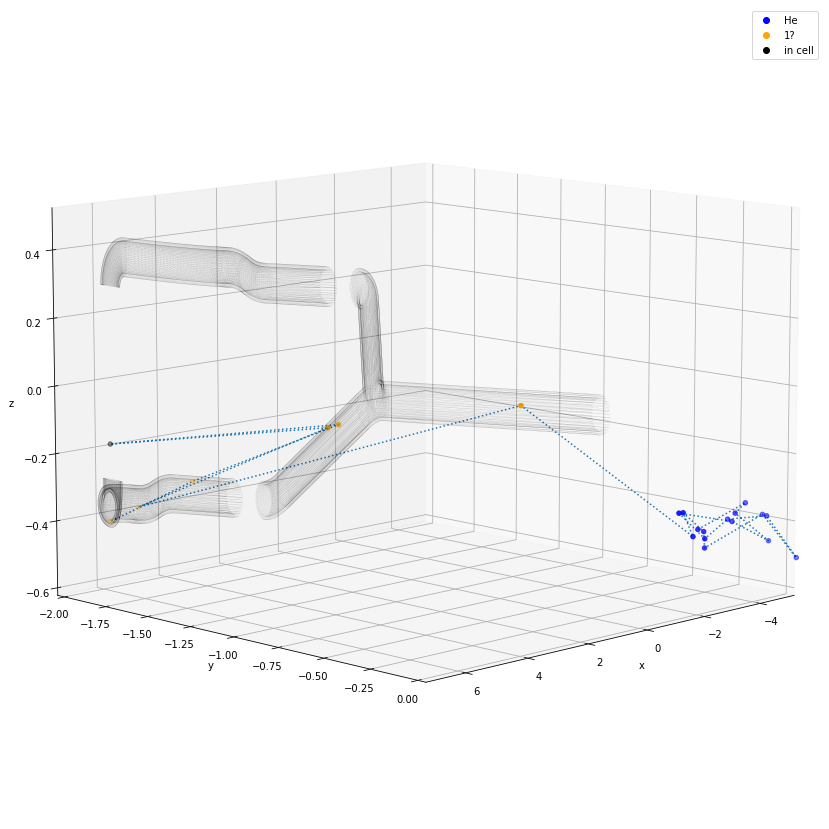

In [60]:
%matplotlib inline 
#lets you move the graph around within jupyter lab

#look at just one particle at different times
t = 100 #(tend%10==0) &
p = 5
endSpots = Nsnapshot.arrays(["tend", "xend", "yend", "zend", 'solidend'], "(particle=={})".format(p), library="np")

x = endSpots['xend'].astype(float)
y = endSpots['yend'].astype(float)
z = endSpots['zend'].astype(float)
geo_tag = endSpots['solidend'].astype(float)
   
figVals = plot3D_geoColor(x, y, z, geo_tag, label="All", startPlot=True, ls=":", endPlot=False, size=(15,15))
fig, axis = figVals

axis.view_init(elev=10., azim=45)

ppf.graphSTL('STLsToGraph/nEDMsensitivity-nEDMguide^nEDMsensitivity-1.STL', axis) #y guide
ppf.graphSTL('STLsToGraph/nEDMsensitivity-CellGuide^nEDMsensitivity-1.STL', axis)
ppf.graphSTL('STLsToGraph/nEDMsensitivity-CellGuide^nEDMsensitivity-2.STL', axis)

# ppf.graphSTL('STLsToGraph/nEDMsensitivity-EDMwSplitElectrodes+Valve-1Insulator+Windows-1Insulator-1.STL', axes)
# ppf.graphSTL('STLsToGraph/nEDMsensitivity-EDMwSplitElectrodes+Valve-1Insulator+Windows-2Insulator-1.STL', axes)

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
axis.legend(by_label.values(), by_label.keys())

# axis.legend()
plt.show()